In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
n_samples = 500
n_features = 2
random_state = 42

X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=6,
                  cluster_std=30,  # Higher standard deviation for more overlap
                  random_state=random_state)

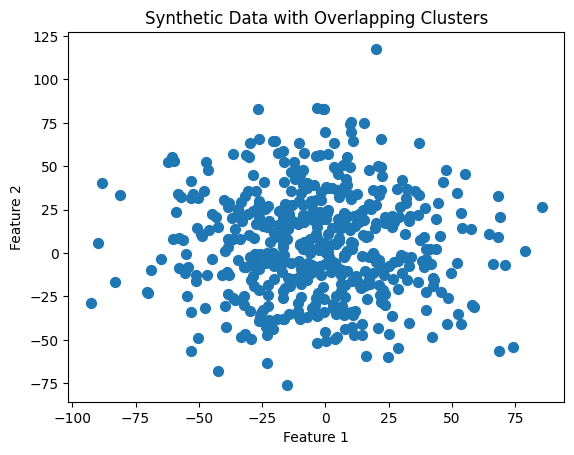

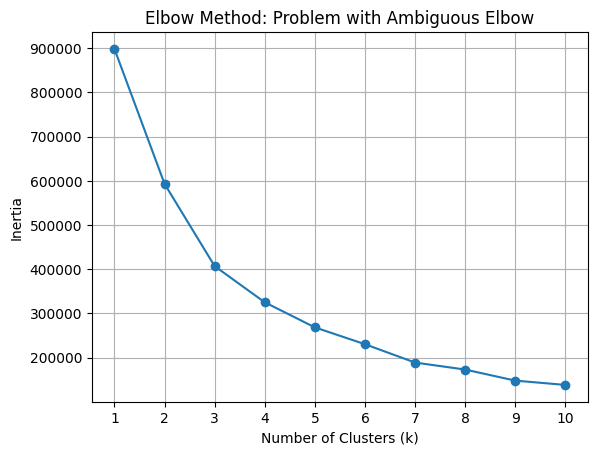

In [11]:
# Visualize the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50,  marker='o')
plt.title("Synthetic Data with Overlapping Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('bad_elbow_data.png')
plt.show()

# Apply k-means clustering with different values of k
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia measures the sum of squared distances to the nearest cluster center

# Plot the elbow curve
plt.figure()
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method: Problem with Ambiguous Elbow")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.savefig('bad_elbow.png')
plt.show()

In [12]:

X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=6,
                  cluster_std=2,  # Higher standard deviation for more overlap
                  random_state=random_state)

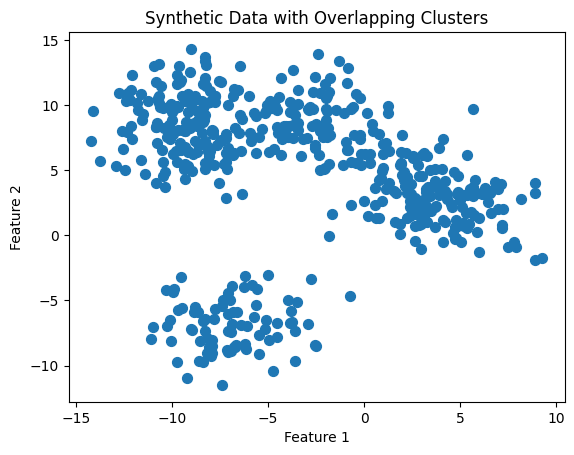

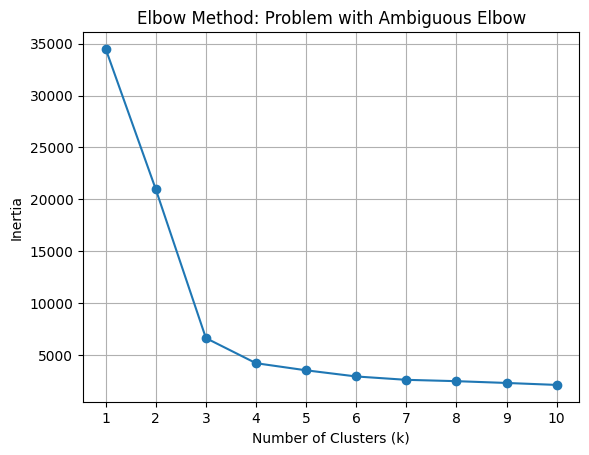

In [13]:
# Visualize the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50,  marker='o')
plt.title("Synthetic Data with Overlapping Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig('good_elbow_data.png')
plt.show()

# Apply k-means clustering with different values of k
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia measures the sum of squared distances to the nearest cluster center

# Plot the elbow curve
plt.figure()
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method: Problem with Ambiguous Elbow")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.savefig('good_elbow.png')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.47064551829192436
For n_clusters = 3 The average silhouette_score is : 0.6108411129555159
For n_clusters = 4 The average silhouette_score is : 0.5448460164067059
For n_clusters = 5 The average silhouette_score is : 0.5065565920027943
For n_clusters = 6 The average silhouette_score is : 0.4375194442537995


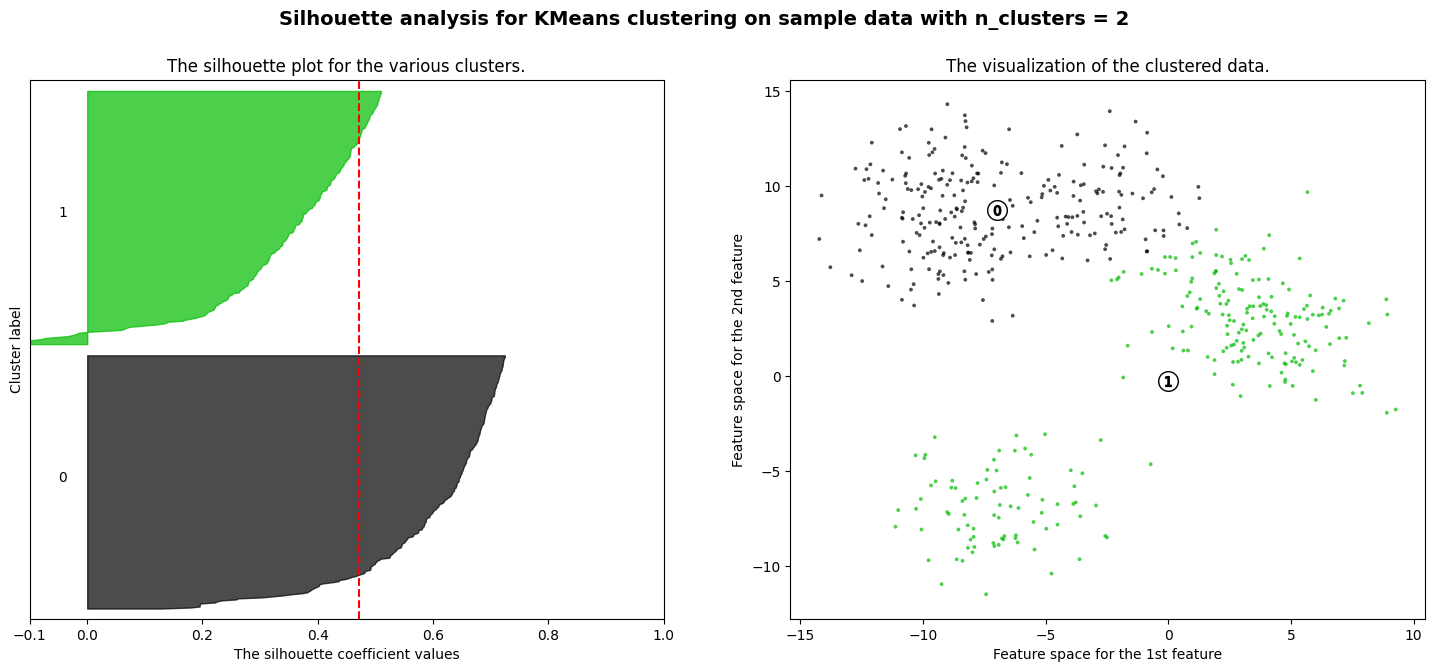

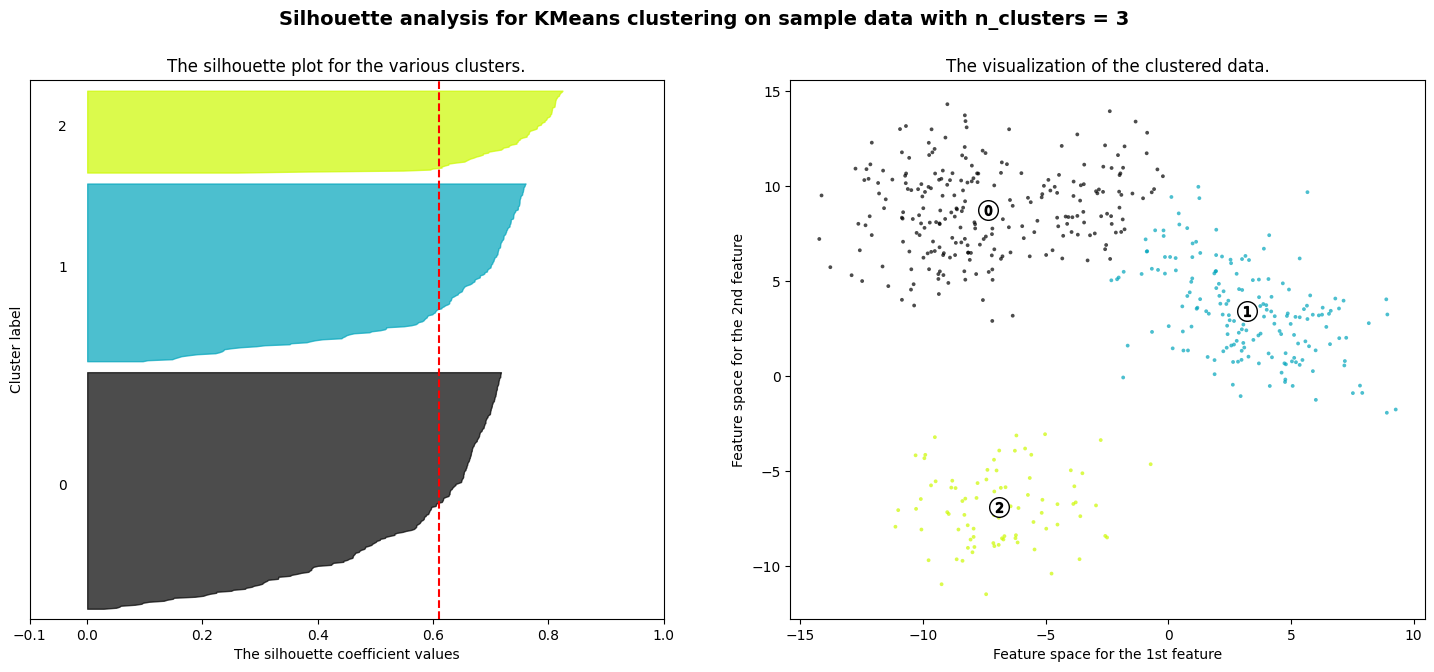

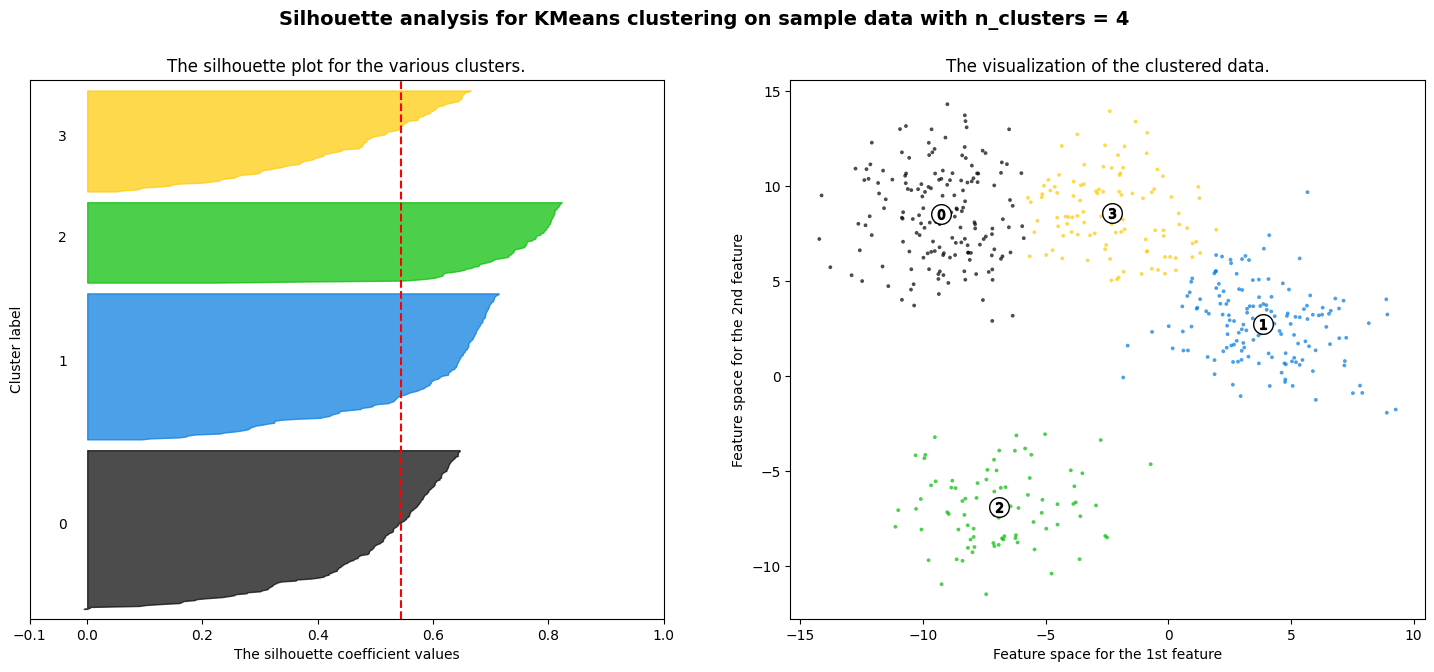

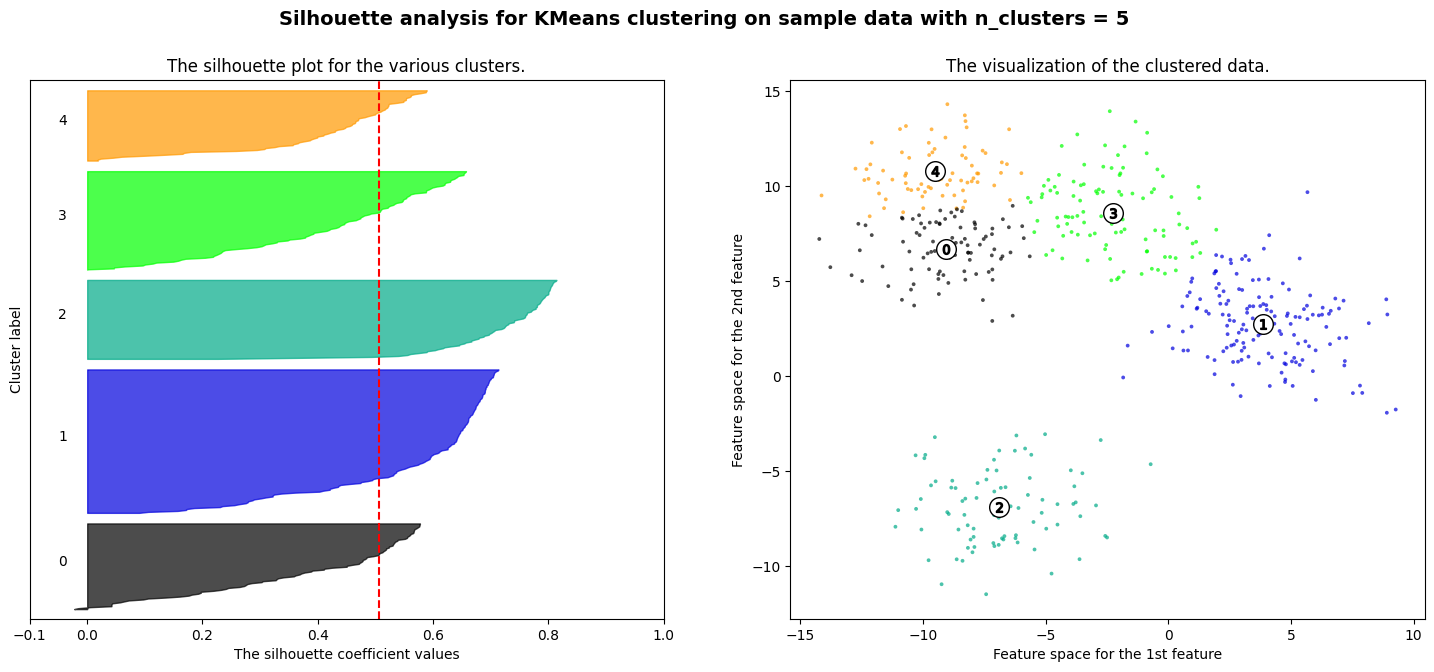

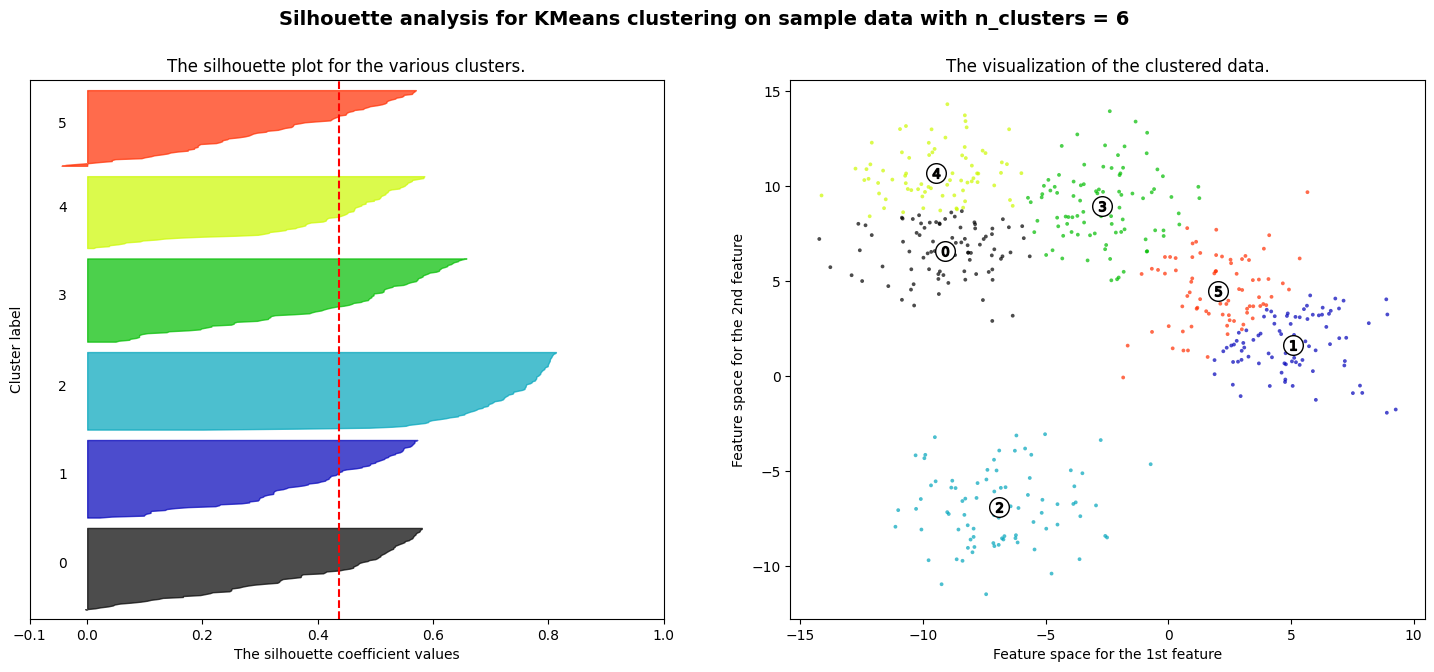

In [14]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    plt.savefig(f'silhouette_{n_clusters}.png')

plt.show()